# 2019-01-21: Initial Data Exploration

### Authors
* Kevin Chu (kevin@velexi.com)

## Preparations

In [1]:
# --- Imports

# Standard libraries
import os
import re

# External packages
import matplotlib.pyplot as plt
import numpy
import pandas

In [2]:
# --- Configuration Parameters

# Data directory
data_dir = os.environ['DATA_DIR']

# Materials
materials = {
    'actinolite': 0,
    'alunite': 1,
    'calcite': 2,
}

### Data Preparation

In [3]:
# --- Load data from files

# Get file list
data_files = [os.path.join(data_dir, file_name) for file_name in os.listdir(data_dir)
              if not file_name.startswith('.') and
              os.path.isfile(os.path.join(data_dir, file_name))]

# Initialize spectra dataset
spectra_data = pandas.DataFrame()

# Initialize material labels
class_labels = []

# Load data files
for file_name in data_files:
    # Read data into DataFrame
    raw_data = pandas.read_csv(file_name)
    
    # Clean up header
    spectra_id = raw_data.columns[0].strip()
    raw_data.columns = [spectra_id]

    # Replace missing values (set to -1.23e+34 in raw data) with 0
    raw_data[spectra_id][raw_data[spectra_id] < 0] = 0.0

    # Append spectra
    spectra_data[spectra_id] = raw_data[spectra_id]

    # Assign class label
    for material, label in materials.items():
        if re.search(material, spectra_id, re.IGNORECASE):
            class_labels.append(label)
            break

# Calculate dataset parameters
spectrum_length, num_spectra = spectra_data.shape

# Convert labels to numpy array
class_labels = numpy.array(class_labels)
class_labels.resize([num_spectra, 1])

## Data Exploration

In [4]:
print("Number of spectra: ", num_spectra)
print("Spectrum length: ", spectrum_length)
print("Sample spectrum: ")
print(spectra_data.iloc[:, 0:1])

Number of spectra:  32
Spectrum length:  480
Sample spectrum: 
     splib07a Record=11621: Actinolite-Hornfels BR93-5a   BECKc AREF
0                                             0.000000              
1                                             0.000000              
2                                             0.000000              
3                                             0.000000              
4                                             0.000000              
5                                             0.000000              
6                                             0.000000              
7                                             0.000000              
8                                             0.000000              
9                                             0.000000              
10                                            0.000000              
11                                            0.000000              
12                                      

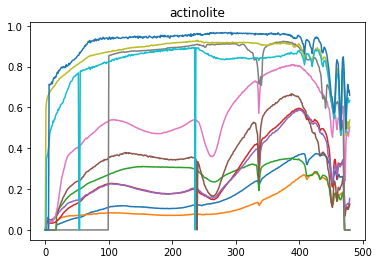

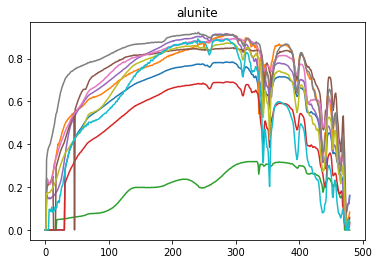

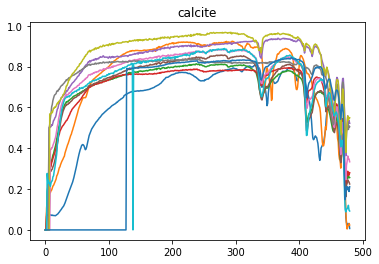

In [5]:
# --- Plot spectra by material

for material_name, material_id in materials.items():
    # Get indices for spectra for material
    spectra_indices = numpy.argwhere(class_labels==material_id)[:, 0]

    # Plot spectra in their own figure
    plt.figure()
    plt.title(material_name)
    plt.plot(spectra_data.iloc[:, spectra_indices])